# Causal Inference: Changes in Gun Laws and Lethal Violence <br> - a Difference-in-Differences Analysis
An updated analysis of Cheng and Hoekstra [2013] review of changes to the Castle Doctrine and resulting changes to lethal violence.

# Exploratory Data Analysis

## Import Libraries

In [6]:
# Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Load Data

In [7]:
# Accessing Google Drive by mounting it locally
from google.colab import drive
drive.mount('/content/drive')

# Location on Google Drive
loc_data = '/content/drive/MyDrive/colab_notebooks/GitHub/causal_inference_castle_doctrine/data/'

# Load Stata datafile into pandas
castle = pd.read_stata(loc_data + 'castle.dta')

# Unmount Google Drive.
drive.flush_and_unmount()

Mounted at /content/drive


## Spatial Analysis of Homicide Rates

In [8]:
# Dictionary for converting state names to abbreviations
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [ ]:
# Format castle dataset for time-series animated choropleth
castle_choro = castle[['state', 'year', 'homicide']]

# Converting floating point homicide rate to an integer.
castle_choro.homicide = castle_choro.homicide * 100
castle_choro.homicide = castle_choro.homicide.astype(int)
castle_choro.rename({'homicide':'Homicide Rate * 100'},axis=1, inplace=True)

# replace state names with abbreviations.
castle_choro = castle_choro.replace({'state': us_state_to_abbrev})

# Convert year category from int16 to time category.
castle_choro.year.astype('int32')
castle_choro.year = pd.to_datetime(castle_choro.year, format='%Y')

# Convert to string and sort for animated px.choropleth
castle_choro.year = castle_choro.year.astype(str)
castle_choro=castle_choro.sort_values('year') 

In [10]:
# US time-series Chorpleth map of Homicide Rates
fig = px.choropleth(castle_choro,
                    locations='state', 
                    locationmode="USA-states", 
                    color='Homicide Rate * 100',
                    color_continuous_scale="Viridis_r", 
                    scope="usa",
                    animation_frame='year') 

# Added a Title
fig.update_layout(
      title_text = '(Homicide Incidents * 100) per 100,000 by State, years 2000 - 2010',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

fig.show()

There do not appear to be any significant spatial correlations.  Constructed control states could be restricted to census regions to account for any variations at the regional scale.

## Raw Data of Homicide Rates

In [ ]:
# Formatting dataset to graph raw homicide rates of treated states versus average of untreated states
castle_l_homicide = castle[['year', 'state', 'l_homicide', 'treatment_date']]
# Convert year to datetime
castle_l_homicide.year.astype('int32')
castle_l_homicide.year = pd.to_datetime(castle_l_homicide.year, format='%Y')

# Break dataset into treated and untreated states
castle_notreat = castle_l_homicide[castle_l_homicide.treatment_date.isnull()]
castle_treat = castle_l_homicide[~castle_l_homicide.treatment_date.isnull()]

# Convert treatment_date to datetime
castle_treat.treatment_date.astype('int32')
castle_treat.treatment_date = pd.to_datetime(castle_treat.treatment_date, format='%Y')

In [65]:
# Calculate average homicide values per year for all untreated states
# Convert year category from int16 to time category.
castle_notreat_ave = castle_notreat.groupby(castle_notreat.year)['l_homicide'].mean()
castle_notreat_ave = castle_notreat_ave.to_frame().reset_index()

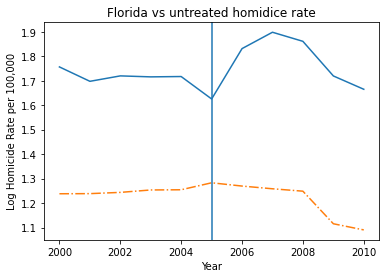

In [67]:
# Graph raw homicide rates for Florida
castle_florida = castle_treat[castle_treat.state == 'Florida']
plt.plot(castle_florida.year, castle_florida.l_homicide)
plt.plot(castle_notreat_ave.year, castle_notreat_ave.l_homicide, '-.')

# Draw a vertical line at the treatment date
plt.axvline(x=castle_florida.treatment_date.mean())

plt.xlabel("Year")
plt.ylabel("Log Homicide Rate per 100,000")
plt.title('Florida vs Untreated Homidice Rate')
plt.show()

Treated State: Alabama


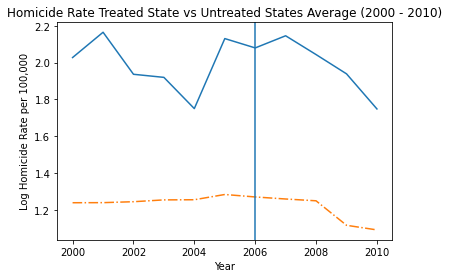

Treated State: Alaska


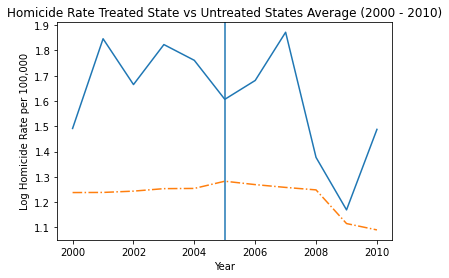

Treated State: Arizona


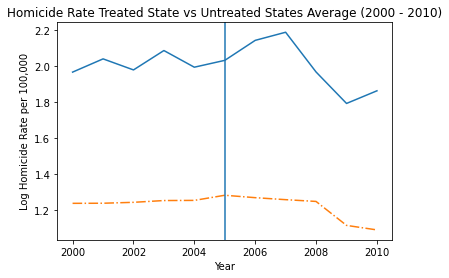

Treated State: Florida


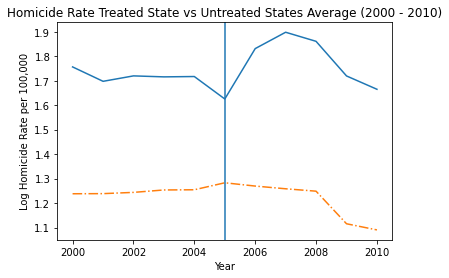

Treated State: Georgia


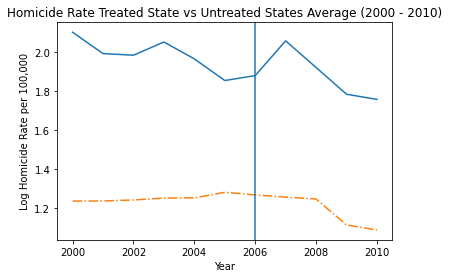

Treated State: Indiana


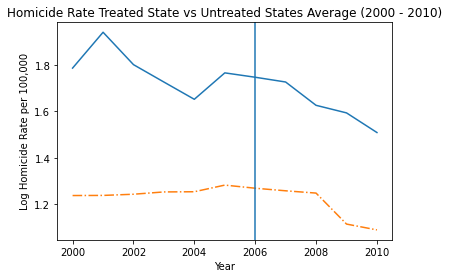

Treated State: Kansas


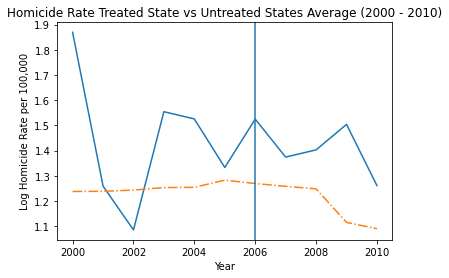

Treated State: Kentucky


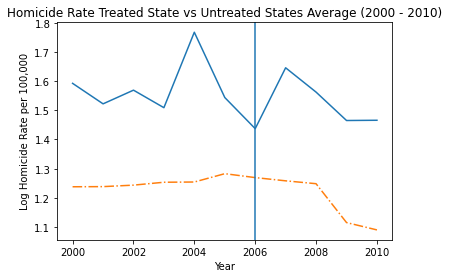

Treated State: Louisiana


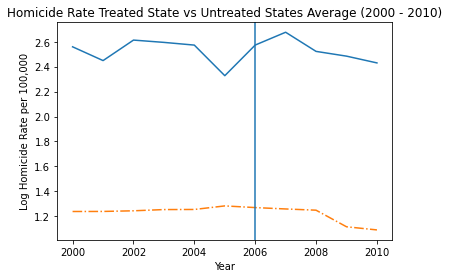

Treated State: Michigan


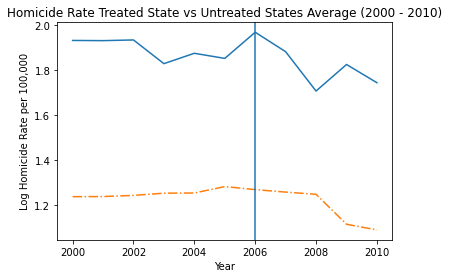

Treated State: Mississippi


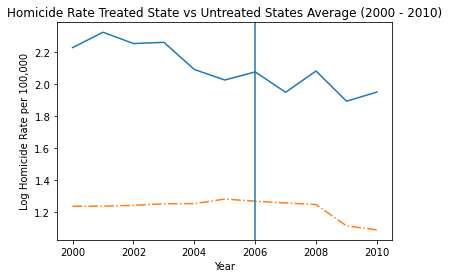

Treated State: Missouri


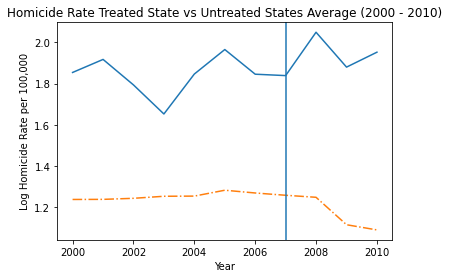

Treated State: Montana


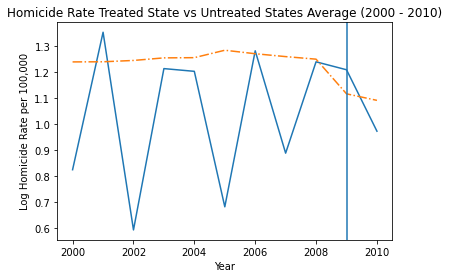

Treated State: North Dakota


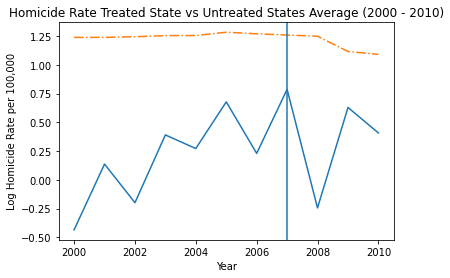

Treated State: Ohio


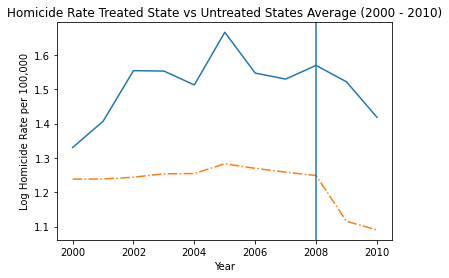

Treated State: Oklahoma


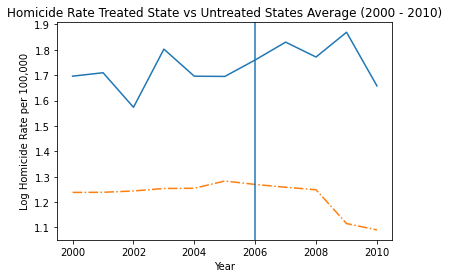

Treated State: South Carolina


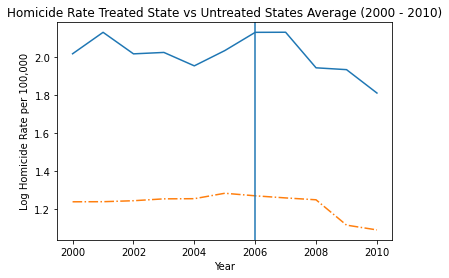

Treated State: South Dakota


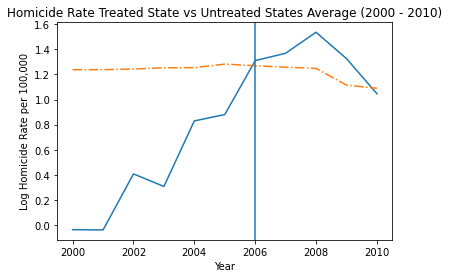

Treated State: Tennessee


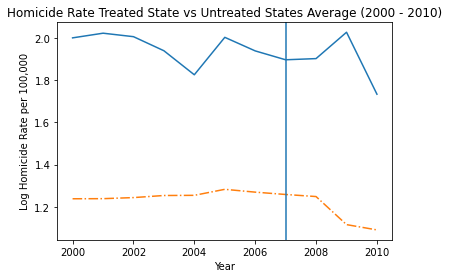

Treated State: Texas


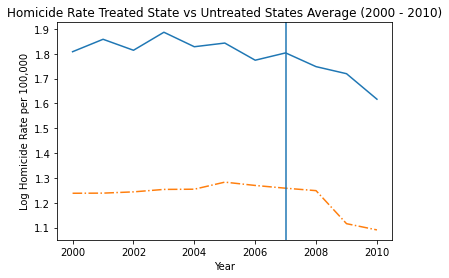

Treated State: West Virginia


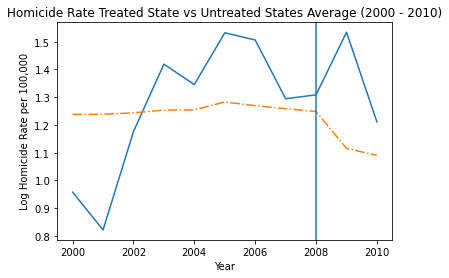

In [70]:
for state in castle_treat.state.unique():
  print(f'Treated State: {state}')
  state = castle_treat[castle_treat['state'] == state]

  plt.plot(state.year, state.l_homicide)
  plt.plot(castle_notreat_ave.year, castle_notreat_ave.l_homicide, '-.')

  # Draw a vertical line at the treatment date
  plt.axvline(x=state.treatment_date.mean())

  plt.title('Homicide Rate Treated State vs Untreated States Average (2000 - 2010)')
  plt.xlabel('Year')
  plt.ylabel('Log Homicide Rate per 100,000')
  plt.show()

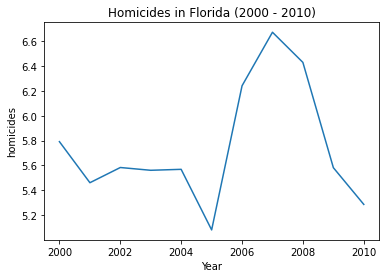

In [ ]:
# Homicides in Florida from 2000 - 2010
florida = castle[castle['state'] == 'Florida']

plt.plot(florida.year, florida.homicide)
plt.title('Homicides in Florida (2000 - 2010)')
plt.xlabel('Year')
plt.ylabel('homicides')
plt.show()

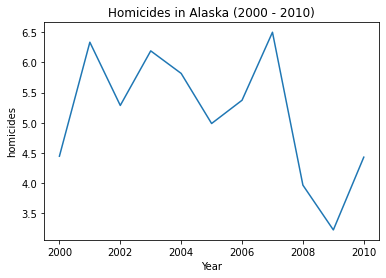

In [68]:
# Homicides in Alaska from 2000 - 2010
alaska = castle[castle['state'] == 'Alaska']

plt.plot(alaska.year, alaska.homicide)
plt.title('Homicides in Alaska (2000 - 2010)')
plt.xlabel('Year')
plt.ylabel('homicides')
plt.show()

Alabama


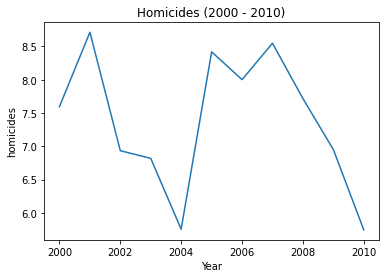

Alaska


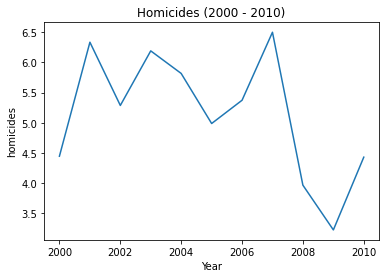

Arizona


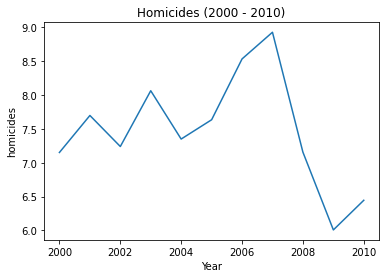

Arkansas


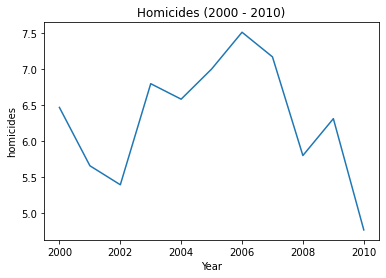

California


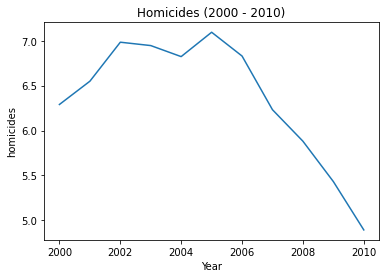

Colorado


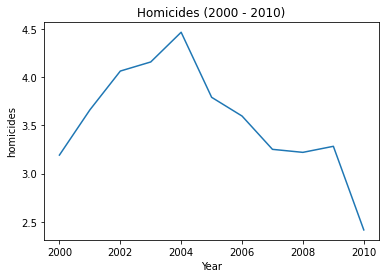

Connecticut


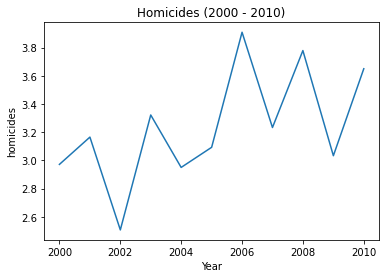

Delaware


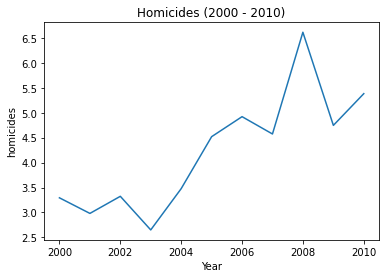

Florida


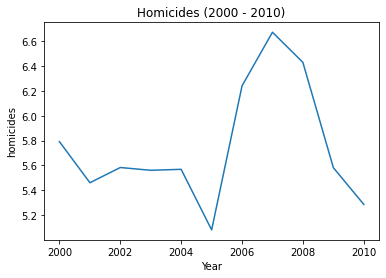

Georgia


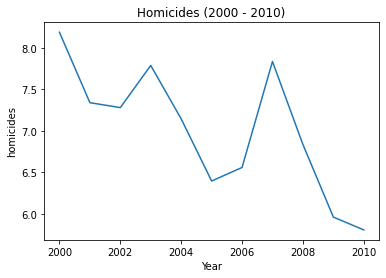

Hawaii


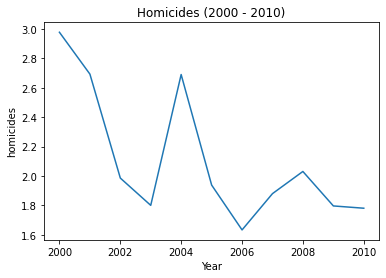

Idaho


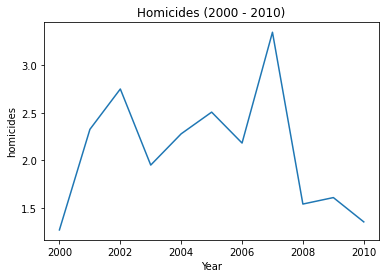

Illinois


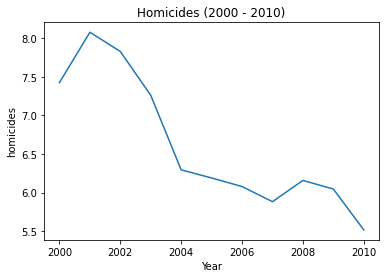

Indiana


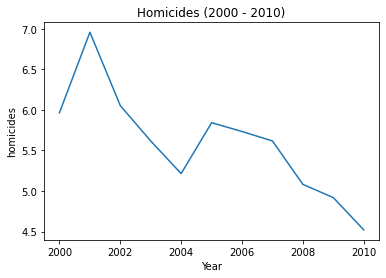

Iowa


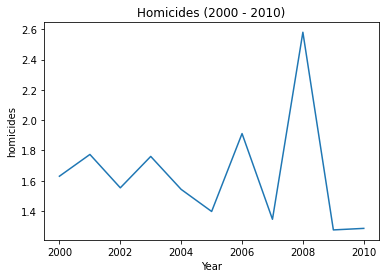

Kansas


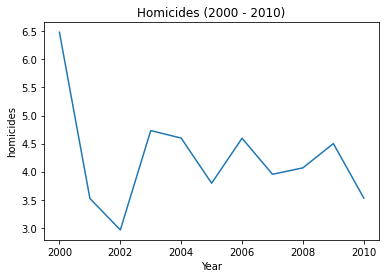

Kentucky


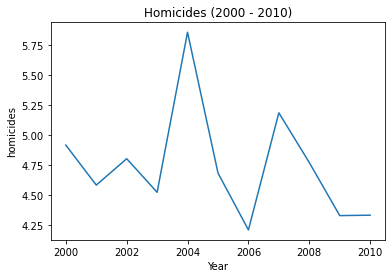

Louisiana


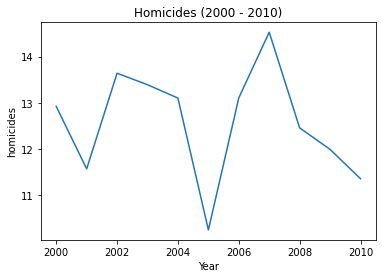

Maine


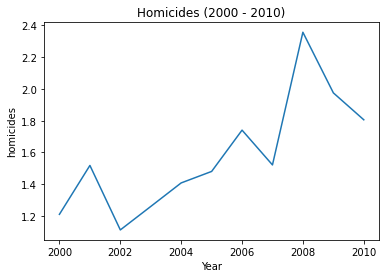

Maryland


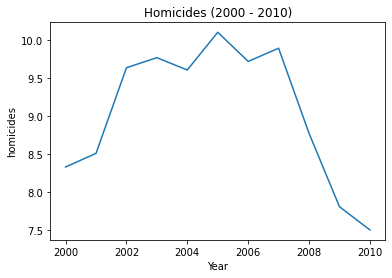

Massachusetts


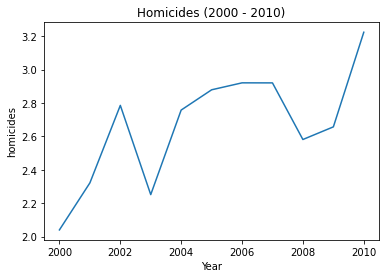

Michigan


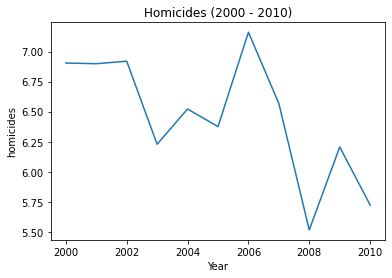

Minnesota


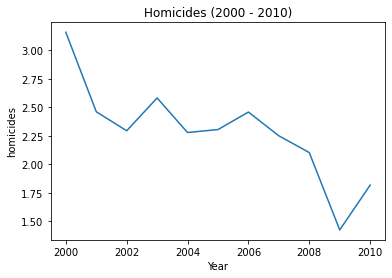

Mississippi


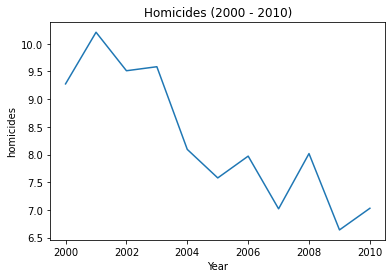

Missouri


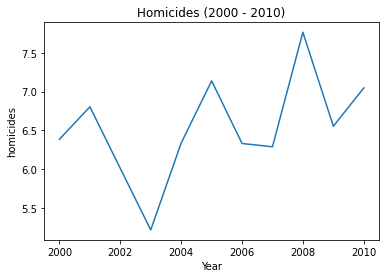

Montana


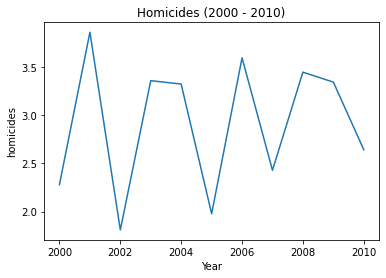

Nebraska


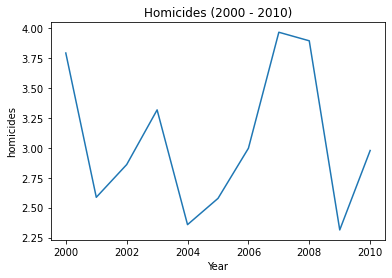

Nevada


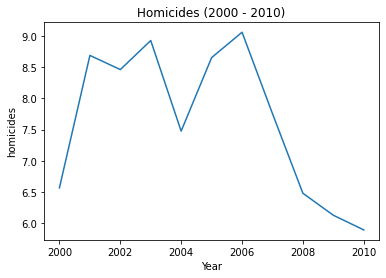

New Hampshire


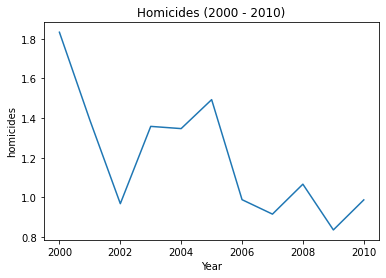

New Jersey


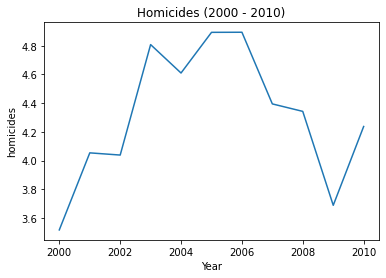

New Mexico


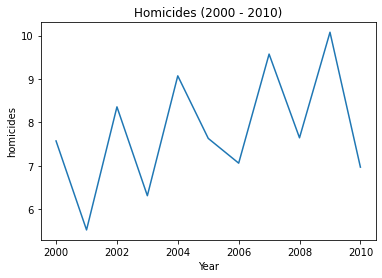

New York


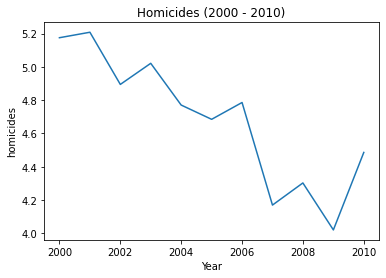

North Carolina


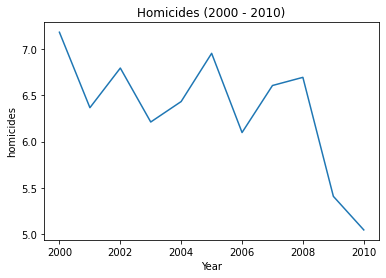

North Dakota


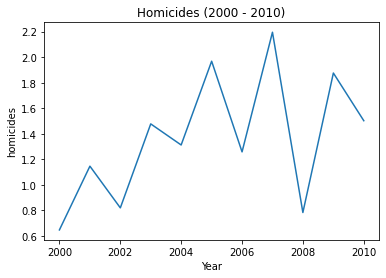

Ohio


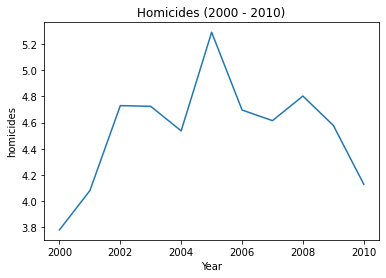

Oklahoma


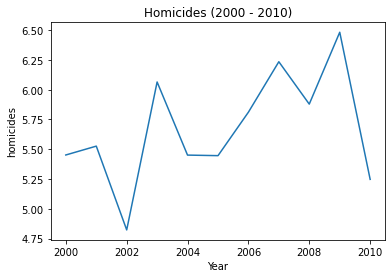

Oregon


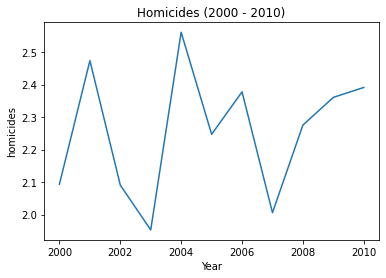

Pennsylvania


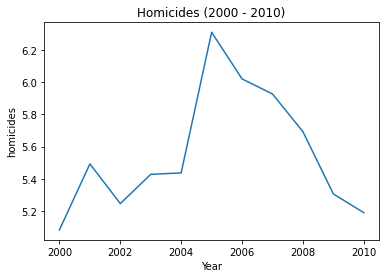

Rhode Island


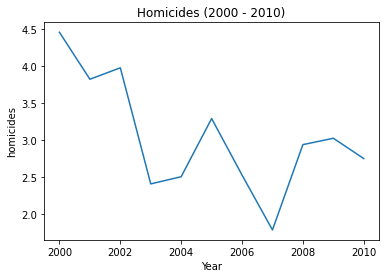

South Carolina


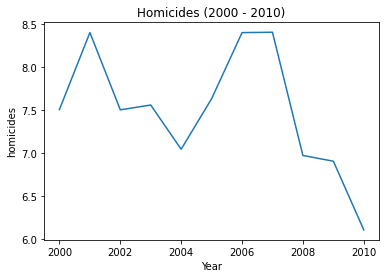

South Dakota


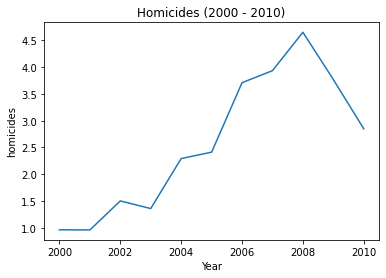

Tennessee


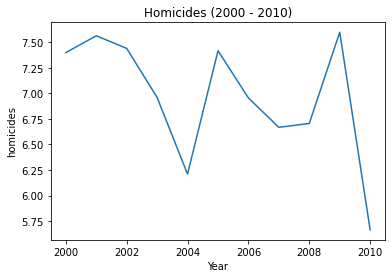

Texas


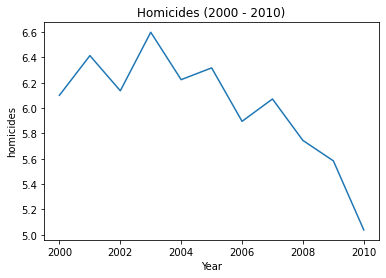

Utah


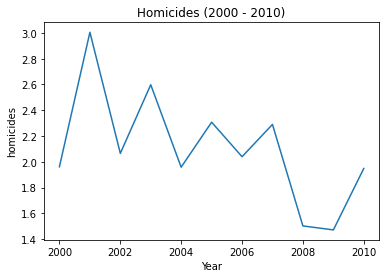

Vermont


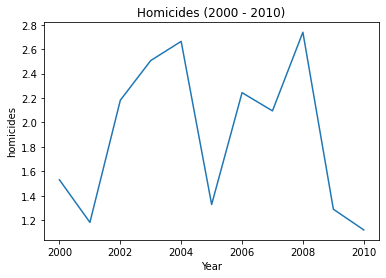

Virginia


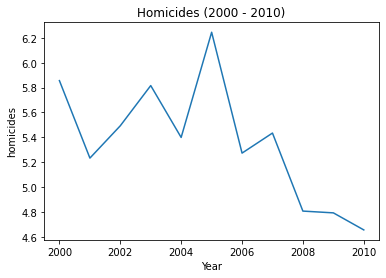

Washington


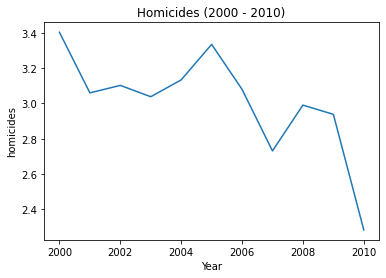

West Virginia


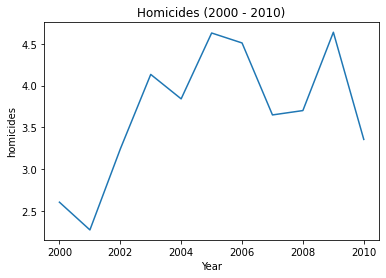

Wisconsin


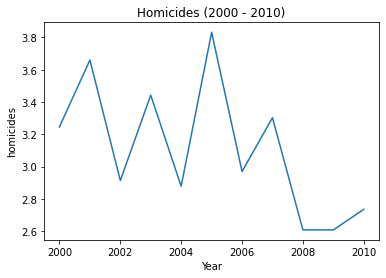

Wyoming


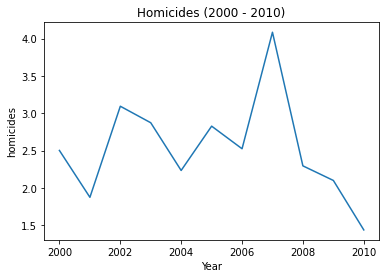

In [ ]:
for state in castle.state.unique():
  print(f'{state}')
  state = castle[castle['state'] == state]

  plt.plot(state.year, state.homicide)
  plt.title('Homicides (2000 - 2010)')
  plt.xlabel('Year')
  plt.ylabel('homicides')
  plt.show()

## Colinearity within the Dataset

In [ ]:
# sns.pairplot(castle)

## EDA Conclusions

Here are the conclusions.